In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns


In [16]:
class NGDataObjectFromFile():
    def get_data(self, path):
        """
        Takes the path to the csv file as input and puts out a pandas dataframe
        File must have the structure of columns: 
            - time (index) (datetime)
            - HV_voltage (float)
            - HV_current (float)
            - dose_corrected (float)
            - neutron_output (float)
            - date (string, object)
        """
        data = pd.read_csv(path)
        data['time'] = pd.to_datetime(data['time'])
        data = data.set_index('time', drop=True)
        
        return data

In [21]:
fname = '/Users/hkromer/02_PhD/02_Data/02.NG_logs/heiko_data/data_combined.csv'


NGdata = NGDataObjectFromFile()

data = NGdata.get_data(fname)
data.head()

,HV_voltage,HV_current,dose_corrected,neutron_output,date
time,,,,,
2017-12-01 00:00:00,0.0,0.0,0.0,-0.0,2017-12-1
2017-12-01 00:00:10,0.0,0.0,0.0,-0.0,2017-12-1
2017-12-01 00:00:20,0.0,0.0,0.0,-0.0,2017-12-1
2017-12-01 00:00:30,0.0,0.0,0.0,-0.0,2017-12-1
2017-12-01 00:00:40,0.0,0.0,0.0,-0.0,2017-12-1


# Plot when the neutron generator was first operated with the new target (loading)

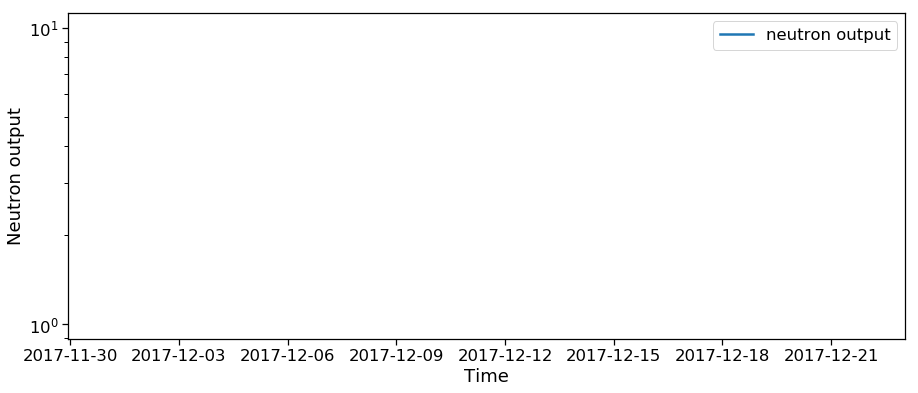

In [28]:
range_start = '2017-11-16 00:00:00'
range_end = '2017-12-30 23:59:00'

this_data = data.loc[range_start:range_end,:]

# plot
fig, ax = plt.subplots(figsize=(15,6))

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
# neutron output
sns.lineplot(x=this_data.index, y='neutron_output', data=this_data, ax=ax, label='neutron output')

ax.set(yscale="log")
ax.set_ylabel('Neutron output')

ax.set_xlabel(f'Time')
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# ax.set_ylim(1e-7, 1e-5)

# plt.savefig(f'{path}pressure_hv_day.png', dpi=1200, format='png')
plt.show()

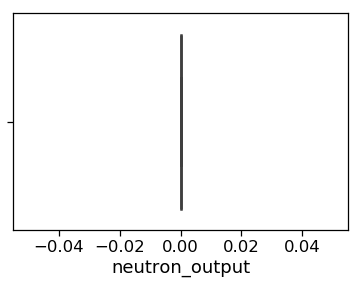

In [29]:
sns.boxplot(x=this_data['neutron_output'])

In [27]:
this_data.describe()

,HV_voltage,HV_current,dose_corrected,neutron_output
count,43175.000000,43175.000000,43175.0,43175.0
mean,7.571981,0.102718,0.0,0.0
std,22.312385,0.300339,0.0,0.0
min,0.000000,0.000000,0.0,-0.0
25%,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.0,-0.0
75%,0.000000,0.000000,0.0,0.0
max,101.315000,1.436000,0.0,-0.0
